In [1]:
from __future__ import division
from datetime import datetime, timedelta
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


import chart_studio.plotly as py
import plotly.offline as pyoff
import plotly.graph_objs as go

In [2]:
tx_data = pd.read_csv('./Data/invoice_customer_plant_jtd.csv')

C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3051: DtypeWarning:

Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.



In [3]:
tx_data.head()

,Cust Type,Customer No.,District,Invoice Date,Invoice No,Invoice Time,Job Card No,JobCard Date,JobCard Time,KMs Reading,...,Data Origin,Title,Name 1,Postal Code,City,State,Description,Item Category,Order Quantity,Net value
0,Retail,80479,Maharashtra,2015-06-19,7151201169,18:10:34,227460,2015-06-19,13:56:32,65714,...,Z010,2.0,X006 - A.M.MOTORS,401104,Thane,Maharashtra,"BULB H1,12V,80W,P145S, Paid Service-Minor, Whe...","P001, P002",45.5,2201.78
1,Retail,E15810,Maharashtra,2016-07-20,7151205340,10:26:00,413455,2016-07-18,15:49:34,53903,...,Z001,2.0,X006 - A.M.MOTORS,401104,Thane,Maharashtra,"MFC PROLEUM C14/SL 15W40, BRAKE PAD SWIFT, OIL...","P001, P002",202.5,6025.86
2,Retail,E15810,Maharashtra,2016-09-04,7151205916,11:12:47,446448,2016-08-30,10:10:59,54231,...,Z001,2.0,X006 - A.M.MOTORS,401104,Thane,Maharashtra,"SEAL, CRANKSHAFT FRONT OIL, ANABOND 666 T (100...","P001, P002",189.0,3464.00
3,Retail,73857,Maharashtra,2016-10-28,7151206592,13:17:54,487708,2016-10-18,17:47:35,55118,...,Z001,2.0,X006 - A.M.MOTORS,401104,Thane,Maharashtra,"MFC PROLEUM C14/SL 15W40, Paid Service-Minor, ...","P001, P002",7.0,2065.75
4,Retail,E25519,Maharashtra,2015-05-28,7151201014,18:20:37,220109,2015-05-28,17:57:40,182687,...,Z001,2.0,X006 - A.M.MOTORS,401104,Thane,Maharashtra,"REMOVE & REFIT WIPER BLADE REAR, NOZZLE-LH WS ...","P001, P002",13.0,653.45


In [4]:
#converting the type of Invoice Date Field from string to datetime.
tx_data['Invoice Date'] = pd.to_datetime(tx_data['Invoice Date'])
#creating YearMonth field for the ease of reporting and visualization
tx_data['InvoiceYearMonth'] = tx_data['Invoice Date'].map(lambda date: 100*date.year + date.month)

In [5]:
pd.options.display.float_format = '{:.4f}'.format

In [7]:
#calculate Revenue for each row and create a new dataframe with YearMonth - Revenue columns
tx_data['Revenue'] = tx_data['Net value']
tx_revenue = tx_data.groupby(['InvoiceYearMonth', 'District'])['Revenue'].sum().reset_index()
tx_revenue

,InvoiceYearMonth,District,Revenue
0,201204,Andhra Pradesh,2560.2800
1,201204,Maharashtra,27956.0200
2,201204,Tamil Nadu,984872.2900
3,201205,Maharashtra,10459.1200
4,201205,Tamil Nadu,682276.0700
...,...,...,...
636,201610,Telangana,3415601.8900
637,201610,Tripura,208.8000
638,201610,Uttar Pradesh,5018118.4000
639,201610,Uttarakhand,2420619.9700


<function matplotlib.pyplot.show(*args, **kw)>

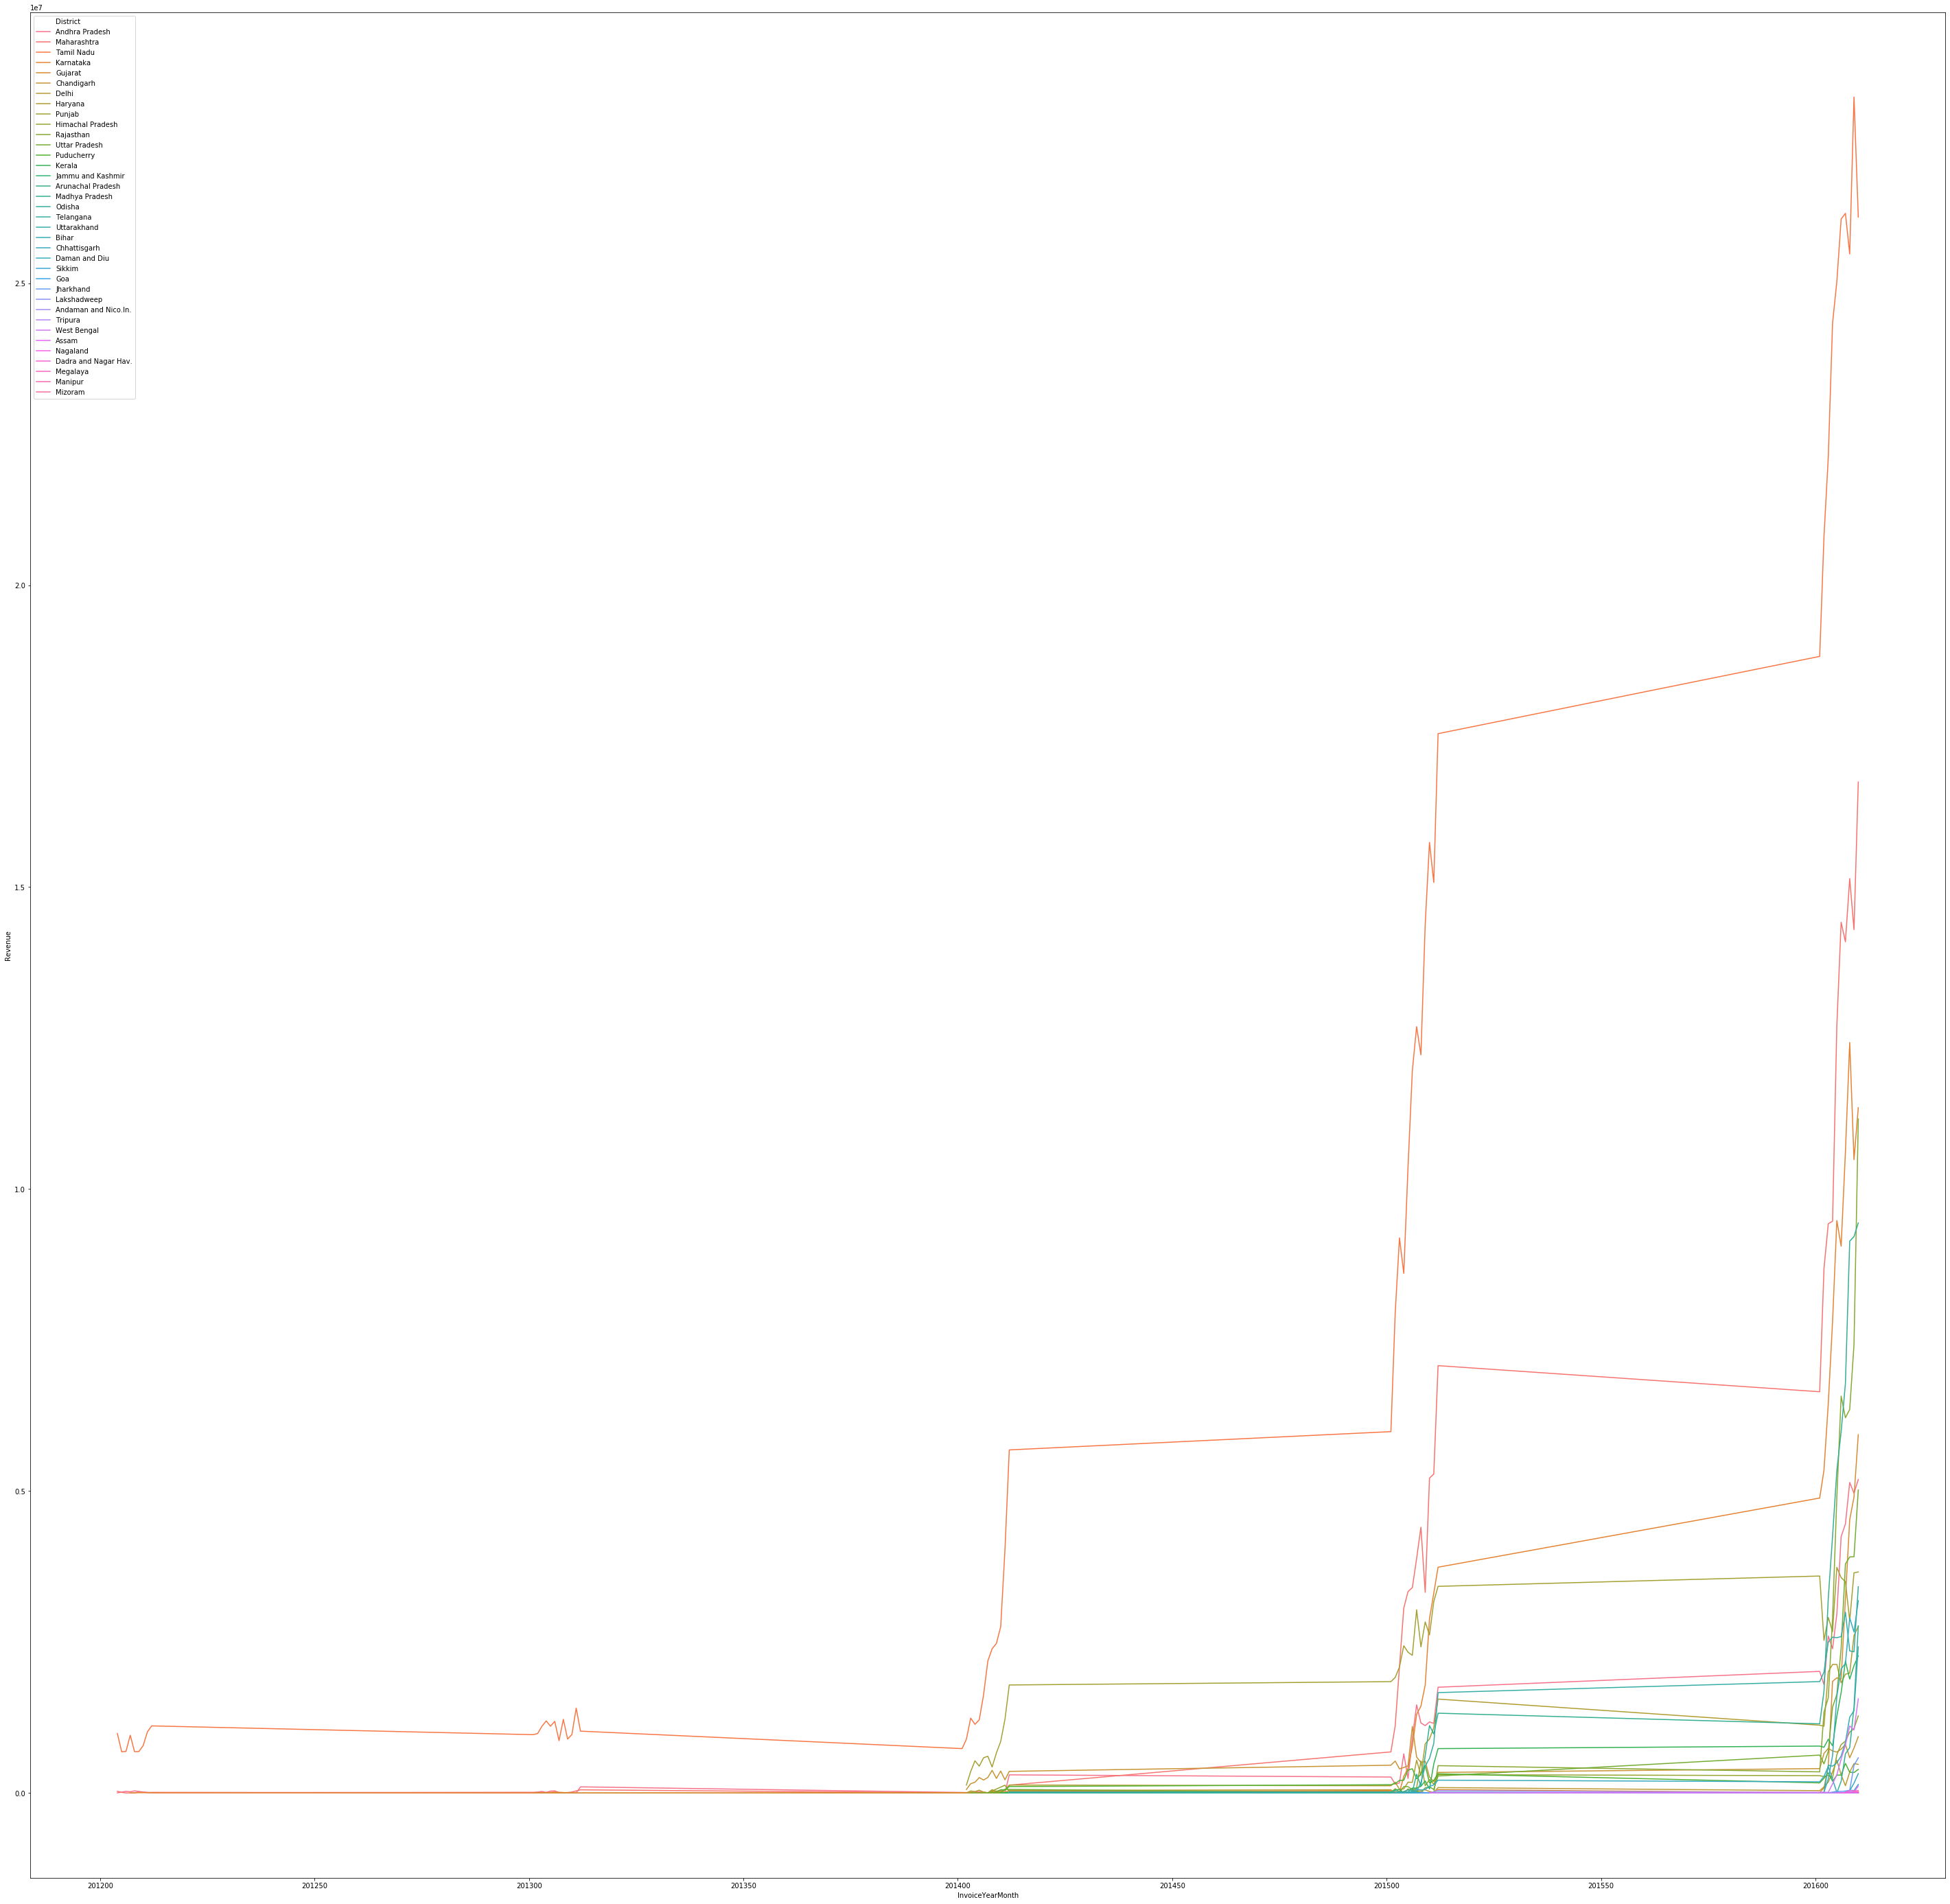

In [12]:
#X and Y axis inputs for Plotly graph. We use Scatter for line graphs
plt.figure(figsize=(50,50))
sns.lineplot(x="InvoiceYearMonth", y="Revenue", data=tx_revenue, hue='District')

plt.show

In [ ]:
pip install "notebook>=5.3" "ipywidgets>=7.2"